139
3600.0 0.012184609999494889 1.0 0.01570550628675658
0.07611911403200644 274.0288105152232


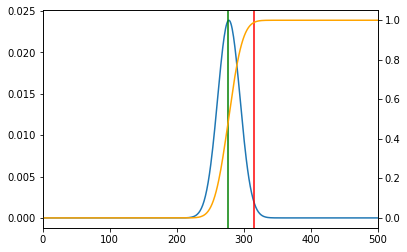

In [3]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def discrete_uniform_sum_pmf(a: int, b: int, n: int):
    final_size = (n * (b - a) + 1)
    single_roll_chance = 1 / (b - a + 1)
    du_sum_pmf = np.zeros(final_size)
    du_sum_pmf[0] = 1

    temp_du_sum_pmf = np.zeros(final_size)
    for i in range(1, n+1):        
        for j, dice in product(range((i-1) * (b - a) + 1), range(a, b+1)):
            temp_du_sum_pmf[j + dice - a] += du_sum_pmf[j] * single_roll_chance
        (du_sum_pmf, temp_du_sum_pmf) = (temp_du_sum_pmf, du_sum_pmf)
        temp_du_sum_pmf[:i * (b - a)+1] = 0

    all_counts = np.arange(a * n, len(du_sum_pmf))
    return (all_counts, du_sum_pmf)

spawn_rate_per_tick = 497000 / 72000 

variance_factor = 1
adjusted_spawn_rate_per_tick = spawn_rate_per_tick / variance_factor
drop_range = (0, int(4 * variance_factor))
interval = 20
repeats = 1
limit = 315*repeats

spawns = int(np.ceil(adjusted_spawn_rate_per_tick * interval * repeats))
print(spawns)

all_counts, pmf = discrete_uniform_sum_pmf(drop_range[0], drop_range[1], spawns)
cmf = np.cumsum(pmf)

min_exceeded_index = limit - all_counts[0] + 1
chance_loss = 0
expected_loss = 0
if min_exceeded_index < len(pmf):
    chance_loss = 1 - cmf[min_exceeded_index-1]
    expected_loss = ((all_counts[min_exceeded_index:]-limit) * pmf[min_exceeded_index:]).sum()

sample_intervals_per_hour = (72000 / (interval * repeats))
hourly_chance_loss = 1 - (1 - chance_loss) ** sample_intervals_per_hour
expected_hours_before_loss = np.log(0.5) / np.log(1 - chance_loss) / sample_intervals_per_hour
expected_loss_per_hr = expected_loss * sample_intervals_per_hour

print(sample_intervals_per_hour, chance_loss, hourly_chance_loss, expected_hours_before_loss)
print(expected_loss, expected_loss_per_hr)

fig, ax1 = plt.subplots()
ax1.set_xlim(0, 500)
ax2 = ax1.twinx()

ax1.plot(all_counts, pmf)
ax2.plot(all_counts, cmf, color='orange')
ax1.axvline(x=limit, color='red')
ax1.axvline(x=2*spawn_rate_per_tick*interval*repeats, color='green')
plt.show()


